In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Perceptron:
    
    def __init__(self, x, y, w):
        self.x = x
        self.y = y
        self.w = w
        
    def predict(self,data_set):
        h = np.dot(data_set,self.w.T)
        h_sign = np.zeros(h.size)
        for i in range(h_sign.size):
            if h[i] > 0:
                h_sign[i] = 1
            else:
                h_sign[i] = -1
        return h_sign
    
    def misclassified(self, h,output):
        miscls = []
        for i in range(output.size):
            if output[i] != h[i]:
                miscls.append(i)
        miscls = np.array(miscls)
        return miscls
        
    def pocket(self,test_data,test_output):
        E_in_pocket = np.zeros(1000)
        E_in = np.zeros(1000)
        E_out_pocket = np.zeros(1000)
        E_out = np.zeros(1000)
        T = 1000
        w_pocket = self.w
        h_pocket = self.predict(self.x)
        h_test_pocket = self.predict(test_data)
        for i in range(T):
            h = self.predict(self.x)
            h_test = self.predict(test_data)
            miscls = self.misclassified(h,y)
            if miscls.size > 0:
                t = random.choice(miscls)
                self.w = self.weight_update(self.y[t],self.x[t])
            if self.misclassified(h,y).size < self.misclassified(h_pocket,y).size :
                w_pocket = self.w
                h_pocket = h
                h_test_pocket = h_test
                
            E_in[i] = miscls.size/self.y.size
            E_in_pocket[i] = self.misclassified(h_pocket,y).size/self.y.size
            E_out[i] = self.misclassified(h_test,test_output).size/test_output.size
            E_out_pocket[i] = self.misclassified(h_test_pocket,test_output).size/test_output.size
            
        self.w = w_pocket
        return E_in,E_in_pocket,E_out,E_out_pocket
    
    def weight_update(self,y_t,x_t):
        return self.w + y_t*x_t

In [3]:
def sign(x,w):
    h = np.dot(w,x)
    if h >= 0:
        return 1
    else:
        return -1    
def generate_data(N):
    miscls_n = round(N/10)
    line_points = np.array([[10, 0] ,[0, 10]])
    w = np.zeros(3)
    y = np.zeros(N)
    w[1] = (line_points[1][0] - line_points[0][0])/(line_points[0][1] - line_points[1][1])
    w[0] = -(line_points[0][0] * 1 + line_points[0][1]*w[1])
    w[2] =  1
    x = []
    for i in range(N-miscls_n):
        x_i = [1,random.randint(0, 10), random.randint(0, 10)]
        y[i] = sign(x_i,w)
        x.append(x_i)
    for i in range(N-miscls_n, N):
        x_i = [1,random.randint(0, 10), random.randint(0, 10)]
        y[i] = -sign(x_i,w)
        x.append(x_i)
    x = np.array(x)
    return x,y,w


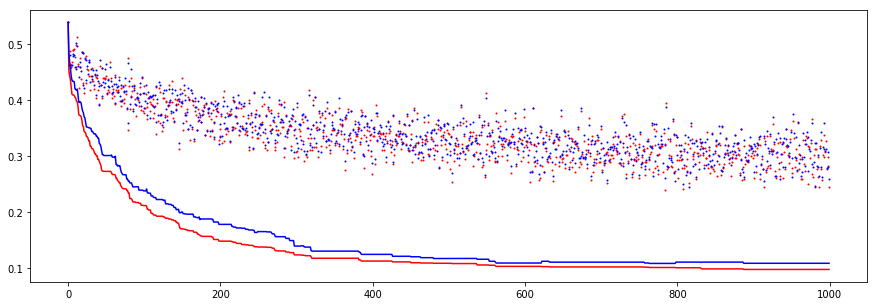

In [7]:
E_in_sum = np.zeros(1000)
E_in_pocket_sum = np.zeros(1000)
E_out_sum = np.zeros(1000)
E_out_pocket_sum = np.zeros(1000)
for i in range(20):
    x,y,ideal_w = generate_data(100)
    x_test,y_test,ideal_w = generate_data(1000)
    w = np.zeros(3)
    newP = Perceptron(x, y, w)
    E_in, E_in_pocket,E_out,E_out_pocket = newP.pocket(x_test,y_test)
    E_in_sum = E_in_sum + E_in
    E_in_pocket_sum =  E_in_pocket_sum + E_in_pocket
    E_out_sum = E_out_sum + E_out
    E_out_pocket_sum =  E_out_pocket_sum + E_out_pocket
E_in =  E_in_sum/20
E_in_pocket = E_in_pocket_sum/20
E_out =  E_out_sum/20
E_out_pocket = E_out_pocket_sum/20
t = range(1000) 
plt.figure(figsize=(15,5))
plt.plot(t,E_in, 'ro',markersize=1)
plt.plot(t,E_in_pocket,'r')
plt.plot(t,E_out, 'bo',markersize=1)
plt.plot(t,E_out_pocket,'b')